# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = y_train.size

# Number of testing examples.
n_test = y_test.size

# What's the shape of an traffic sign image?
image_shape = X_train.shape

# How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Following is the sign number and sign name: ['37', 'Go straight or left']


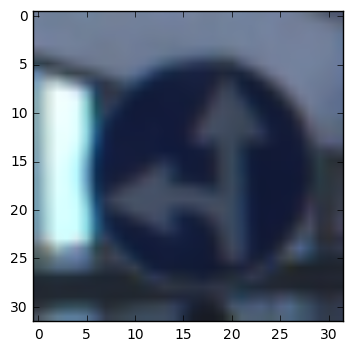

In [3]:
### Data exploration visualization code

import matplotlib.pyplot as plt
import csv

#%matplotlib inline

with open('signnames.csv', 'r') as f:
  reader = csv.reader(f)
  sign_list = list(reader)
    

##########################################################################
################### Enter a number between 0 and 34799 ###################
############ The code will state the name and print the sign #############
##########################################################################

number = 5000

print("Following is the sign number and sign name:",sign_list[y_train[number]+1])
imgplot = plt.imshow(X_train[number,:,:,:])
plt.show()

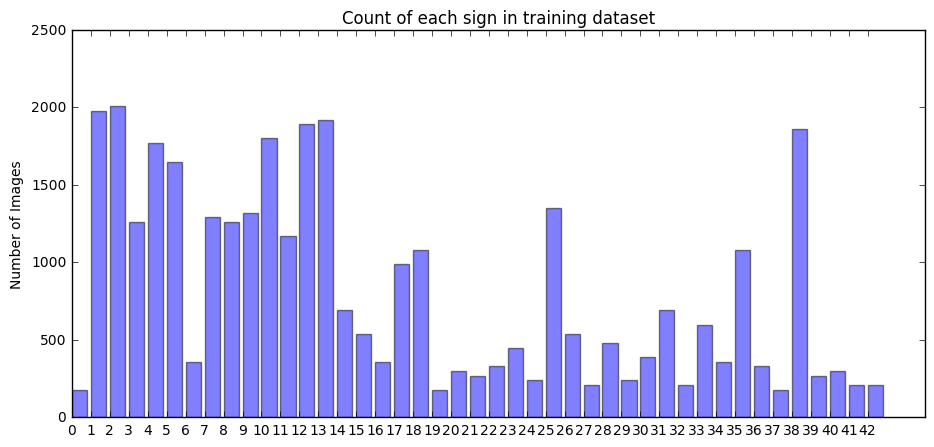

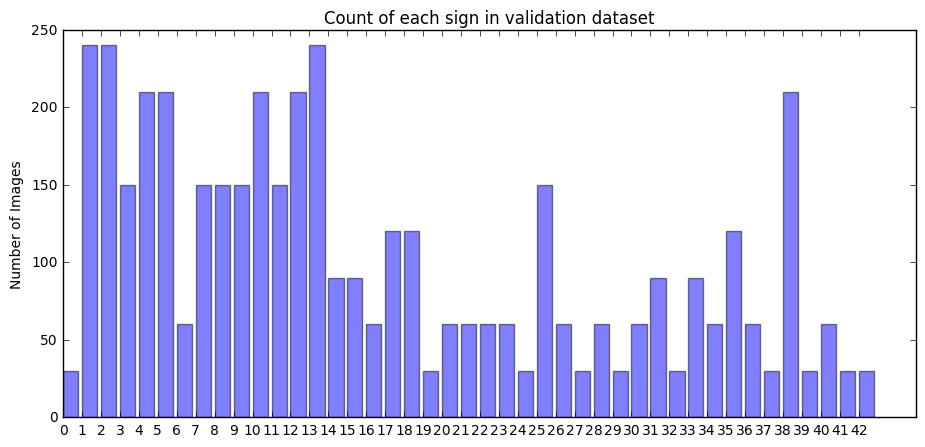

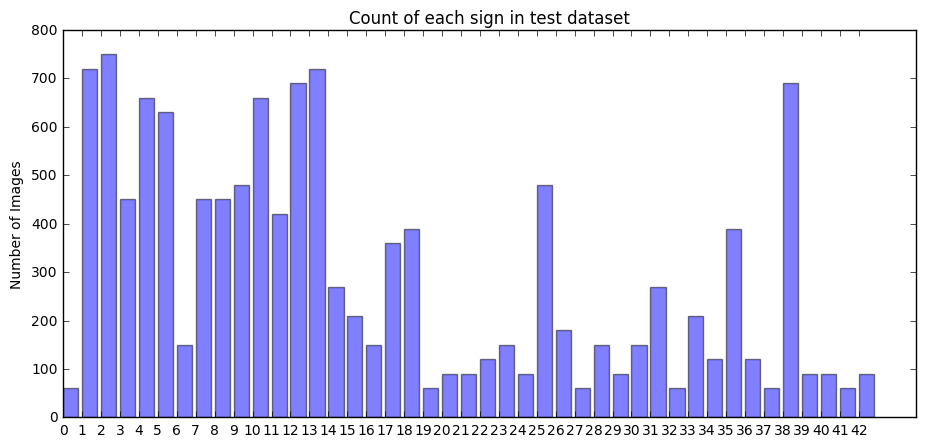

In [4]:
##########################################################################
########### This code will print number of images of each sign ###########
##########################################################################

# Training data plot

x=np.zeros(43)
for i in range(0, 43):
    for number in range(len(y_train)):
        if y_train[number]==i:
            x[i]+=1


objects = range(0,43)
y_pos = np.arange(len(objects))
plt.figure(figsize=(11,5))
plt.bar(y_pos, x, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Count of each sign in training dataset')

# Validation data plot

x=np.zeros(43)
for i in range(0, 43):
    for number in range(len(y_valid)):
        if y_valid[number]==i:
            x[i]+=1

objects = range(0,43)
y_pos = np.arange(len(objects))
plt.figure(figsize=(11,5))
plt.bar(y_pos, x, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Count of each sign in validation dataset')


# Test data plot

x=np.zeros(43)
for i in range(0, 43):
    for number in range(len(y_test)):
        if y_test[number]==i:
            x[i]+=1

objects = range(0,43)
y_pos = np.arange(len(objects))
plt.figure(figsize=(11,5))
plt.bar(y_pos, x, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Count of each sign in test dataset')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# Preprocessing: Convert to grayscale

import cv2
from sklearn.utils import shuffle

X_trainnew=np.zeros((y_train.size,32,32))
for i in range(len(y_train)):
    X_trainnew[i,:,:]=cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_BGR2GRAY)

X_validnew=np.zeros((y_valid.size,32,32))
for i in range(len(y_valid)):
    X_validnew[i,:,:]=cv2.cvtColor(X_valid[i,:,:,:], cv2.COLOR_BGR2GRAY)
    
X_testnew=np.zeros((y_test.size,32,32))
for i in range(len(y_test)):
    X_testnew[i,:,:]=cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_BGR2GRAY)


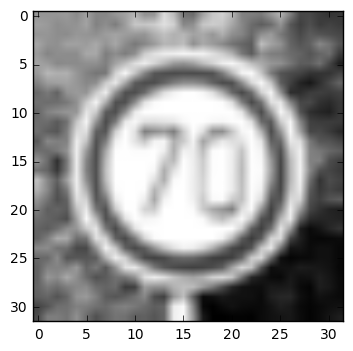

In [6]:
## Test Pre-processing: Enter number to test it ##
number = 8000
imgplot = plt.imshow(X_trainnew[number,:,:], cmap='gray')
plt.show()

In [7]:
# Make 3D axis a 4D to add it in placeholder
X_trainnew = X_trainnew[:, :, :, np.newaxis]
X_validnew = X_validnew[:, :, :, np.newaxis]
X_testnew = X_testnew[:, :, :, np.newaxis]

### Model Architecture

In [21]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 25
BATCH_SIZE = 256

def LeNet(x):    
    mu = 0
    sigma = 0.01

    # Convolutional layer: Input = 32x32x1. Output = 13x13x4.
    weight1 = tf.Variable(tf.truncated_normal(shape=(7, 7, 1, 4),mean=mu,stddev=sigma))
    bias1 = tf.Variable(tf.zeros(4))
    layer1 = tf.nn.conv2d(x,weight1,strides=[1,2,2,1],padding='VALID')
    layer1 = tf.nn.bias_add(layer1, bias1)
    layer1 = tf.nn.relu(layer1)
    
    # Pooling Layer: Input = 26x26x4. Output = 13x13x4.
    #layer1_pool = tf.nn.max_pool(layer1, ksize = [1,2,2,1], strides = [1,2,2,1], padding='SAME')
    
    # Convolutional Layer: Input = 13x13x4. Output = 10x10x8.
    weight2 = tf.Variable(tf.truncated_normal(shape=(4, 4, 4, 8),mean=mu,stddev=sigma))
    bias2 = tf.Variable(tf.zeros(8))
    layer2 = tf.nn.conv2d(layer1,weight2,strides=[1,1,1,1],padding='VALID')
    layer2 = tf.nn.bias_add(layer2, bias2)
    layer2 = tf.nn.relu(layer2)
    
    # Convolutional Layer: Input = 10x10x4. Output = 10x10x8.
    #weight3 = tf.Variable(tf.truncated_normal(shape=(2, 2, 6, 8),mean=mu,stddev=sigma))
    #bias3 = tf.Variable(tf.zeros(8))
    #layer3 = tf.nn.conv2d(layer2,weight3,strides=[1,1,1,1],padding='VALID')
    #layer3 = tf.nn.bias_add(layer3, bias3)
    #layer3 = tf.nn.relu(layer3)
    
    # Flatten: Input = 10x10x8. Output = 800.
    flat_layer2 = flatten(layer2)
    
    # Fully Connected Layer: Input = 800. Output = 200.
    #weight3 = tf.Variable(tf.truncated_normal(shape=(676,200),mean=mu,stddev=sigma))
    #bias3 = tf.Variable(tf.zeros(200))
    #layer3 =tf.add(tf.matmul(flat_layer2, weight3), bias3)
    #layer3 = tf.nn.relu(layer3)
    
    # Fully Connected Layer: Input = 172. Output = 43.
    weight4 = tf.Variable(tf.truncated_normal(shape=(800,43),mean=mu,stddev=sigma))
    bias4 = tf.Variable(tf.zeros(43))
    logits =tf.add(tf.matmul(flat_layer2, weight4), bias4)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [27]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_trainnew, y_train = shuffle(X_trainnew, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_trainnew[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validnew, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    test_accuracy = evaluate(X_testnew, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.781

EPOCH 2 ...
Validation Accuracy = 0.860

EPOCH 3 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.874

EPOCH 6 ...
Validation Accuracy = 0.877

EPOCH 7 ...
Validation Accuracy = 0.888

EPOCH 8 ...
Validation Accuracy = 0.875

EPOCH 9 ...
Validation Accuracy = 0.892

EPOCH 10 ...
Validation Accuracy = 0.893

EPOCH 11 ...
Validation Accuracy = 0.903

EPOCH 12 ...
Validation Accuracy = 0.906

EPOCH 13 ...
Validation Accuracy = 0.900

EPOCH 14 ...
Validation Accuracy = 0.903

EPOCH 15 ...
Validation Accuracy = 0.896

EPOCH 16 ...
Validation Accuracy = 0.895

EPOCH 17 ...
Validation Accuracy = 0.885

EPOCH 18 ...
Validation Accuracy = 0.904

EPOCH 19 ...
Validation Accuracy = 0.893

EPOCH 20 ...
Validation Accuracy = 0.903

EPOCH 21 ...
Validation Accuracy = 0.901

EPOCH 22 ...
Validation Accuracy = 0.913

EPOCH 23 ...
Validation Accuracy = 0.910

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

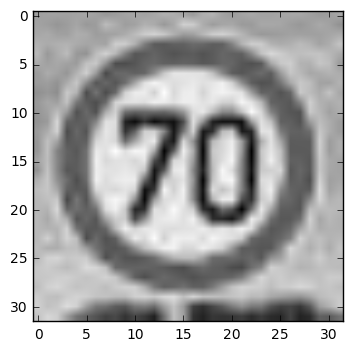

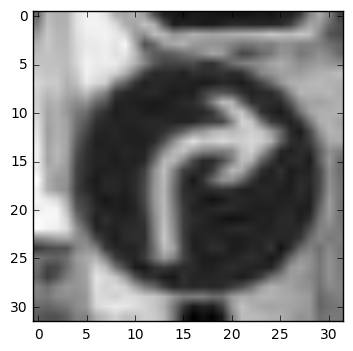

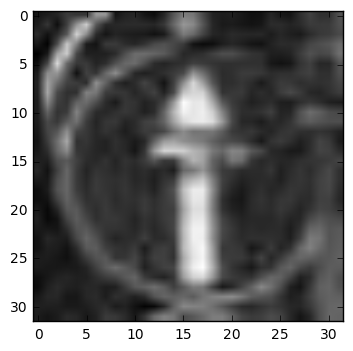

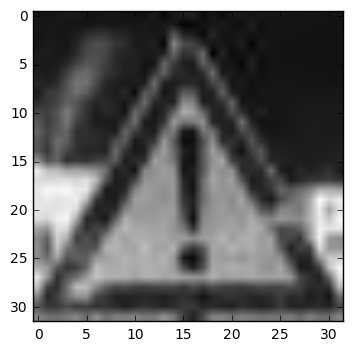

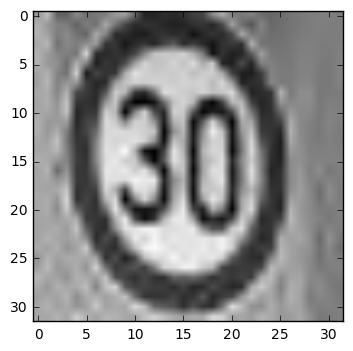

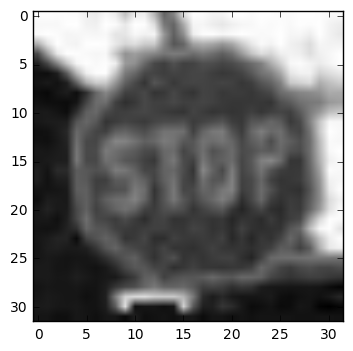

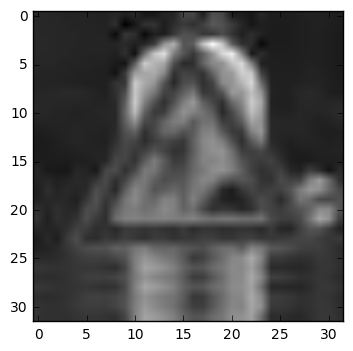

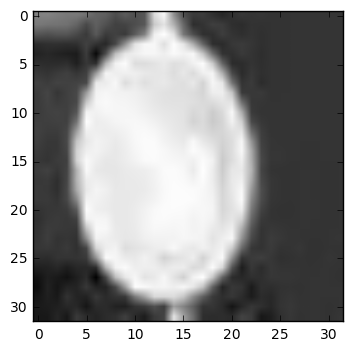

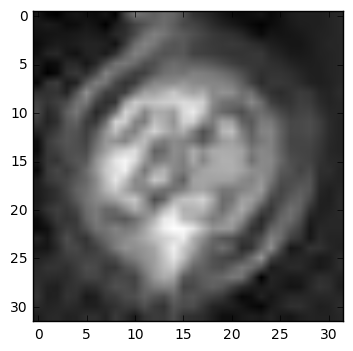

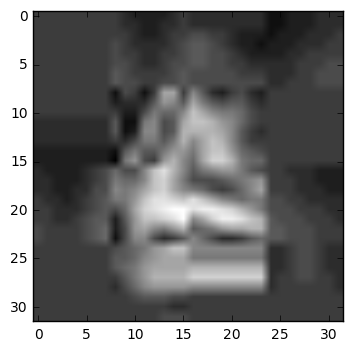

In [10]:
# Images were taken from internet and converted to 32x32

img1 = cv2.imread('70.jpg',0)
img2 = cv2.imread('right.jpg',0)
img3 = cv2.imread('ahead.jpg',0)
img4 = cv2.imread('caution.jpg',0)
img5 = cv2.imread('30.jpg',0)
img6 = cv2.imread('stop.jpg',0)
img7 = cv2.imread('work.jpg',0)
img8 = cv2.imread('keepright.jpg',0)
img9 = cv2.imread('30n.jpg',0)
img10 = cv2.imread('wild.jpg',0)

# Make 2D images into 4D to add it in placeholder
Z_data= np.dstack((img1,img2,img3,img4,img5,img6,img7,img8,img9,img10))
Z_data=np.swapaxes(Z_data,1,2)
Z_data=np.swapaxes(Z_data,0,1)
Z_data = Z_data[:, :, :, np.newaxis]

for i in range(0,10):
    plt.figure()
    imgplot = plt.imshow(np.squeeze(Z_data[i]), cmap='gray')
    plt.show()

### Predict the Sign Type for Each Image

In [11]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    feed_dict = {x: Z_data}
    prediction = tf.nn.softmax(logits)
    classification = sess.run(prediction, feed_dict)
    top5p, top5 = sess.run(tf.nn.top_k(tf.constant(classification), k=5))

### Analyze Performance

In [12]:
zy_data=[4,33,35,18,1,14,25,38,1,31] #These are the actual answers

accurate=0
for i in range(0,len(zy_data)):
    if top5[i][0]==zy_data[i]:
        accurate=accurate+1

print("Accuracy of analyzing images is",accurate/len(zy_data))

Accuracy of analyzing images is 0.5


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

The below image, as guessed by the neural network, is: ['1', 'Speed limit (30km/h)']
The actual answer is: ['4', 'Speed limit (70km/h)']


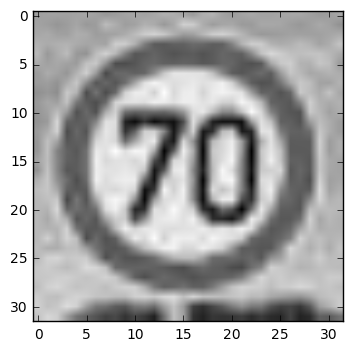

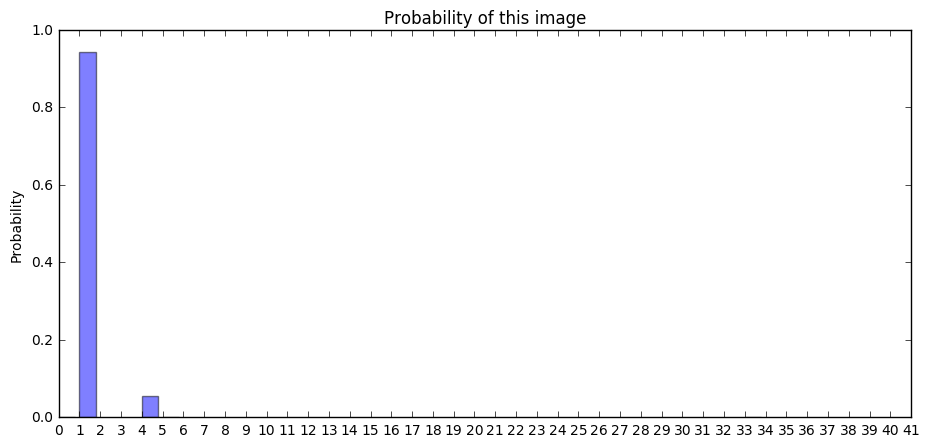

The below image, as guessed by the neural network, is: ['33', 'Turn right ahead']
The actual answer is: ['33', 'Turn right ahead']


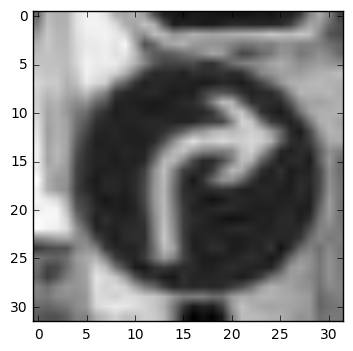

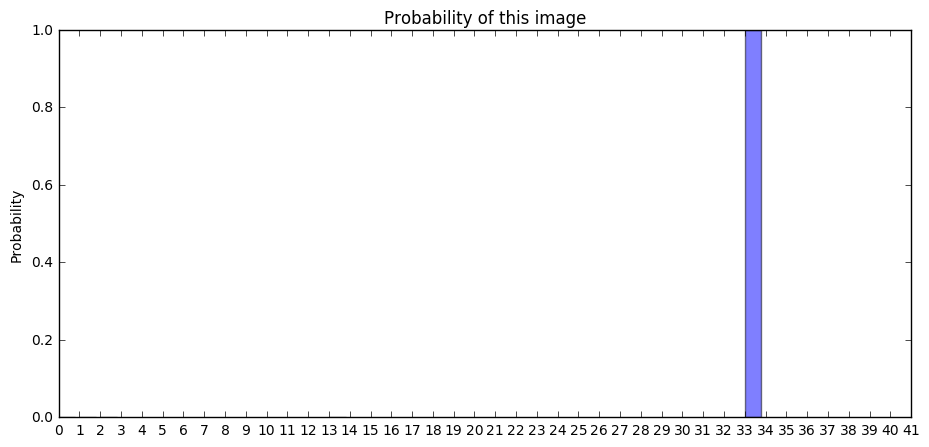

The below image, as guessed by the neural network, is: ['35', 'Ahead only']
The actual answer is: ['35', 'Ahead only']


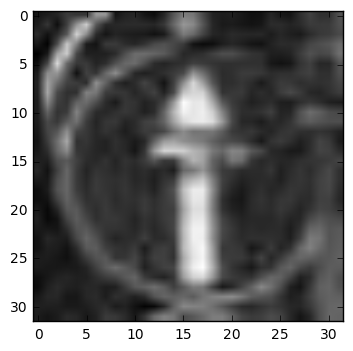

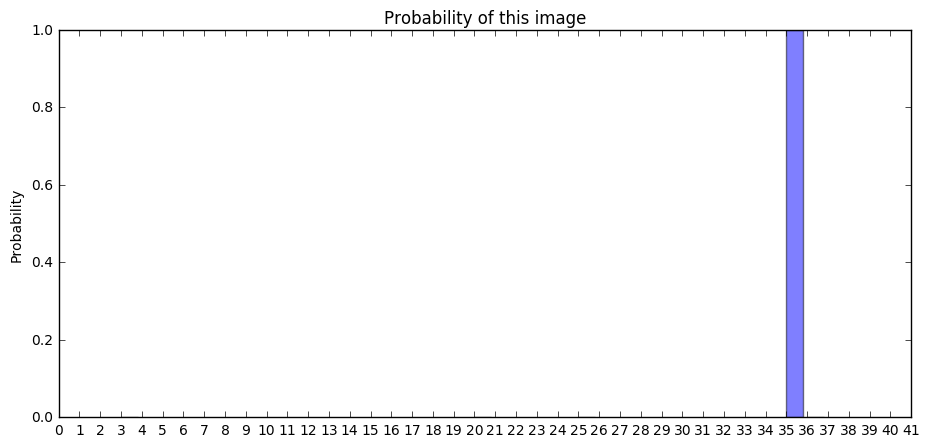

The below image, as guessed by the neural network, is: ['18', 'General caution']
The actual answer is: ['18', 'General caution']


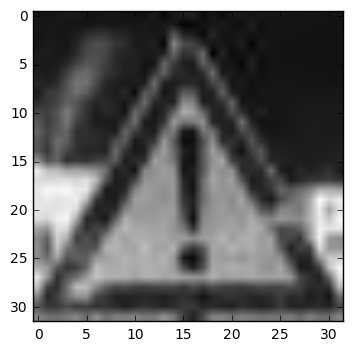

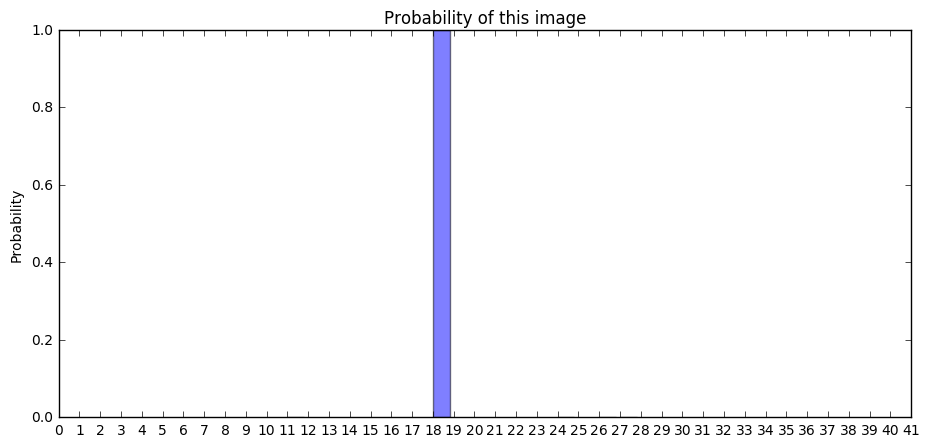

The below image, as guessed by the neural network, is: ['1', 'Speed limit (30km/h)']
The actual answer is: ['1', 'Speed limit (30km/h)']


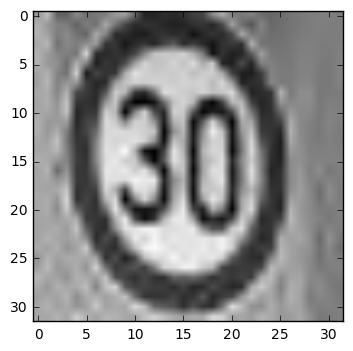

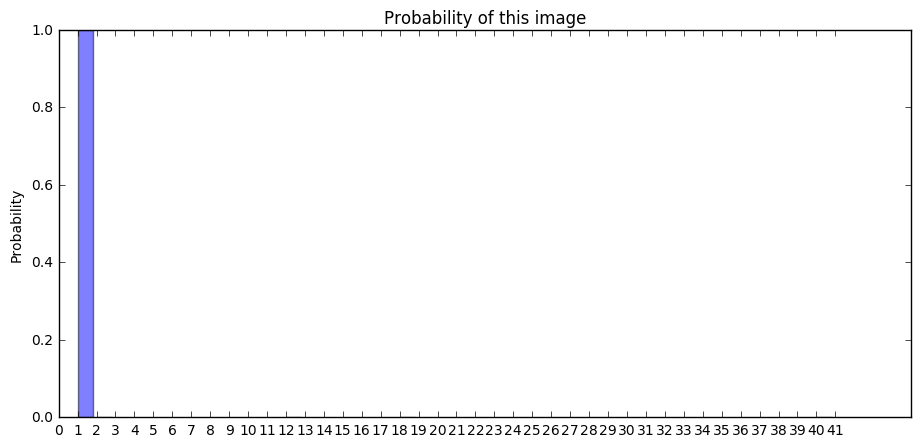

The below image, as guessed by the neural network, is: ['14', 'Stop']
The actual answer is: ['14', 'Stop']


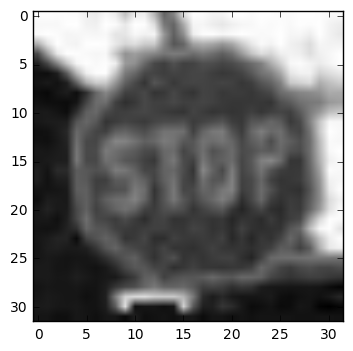

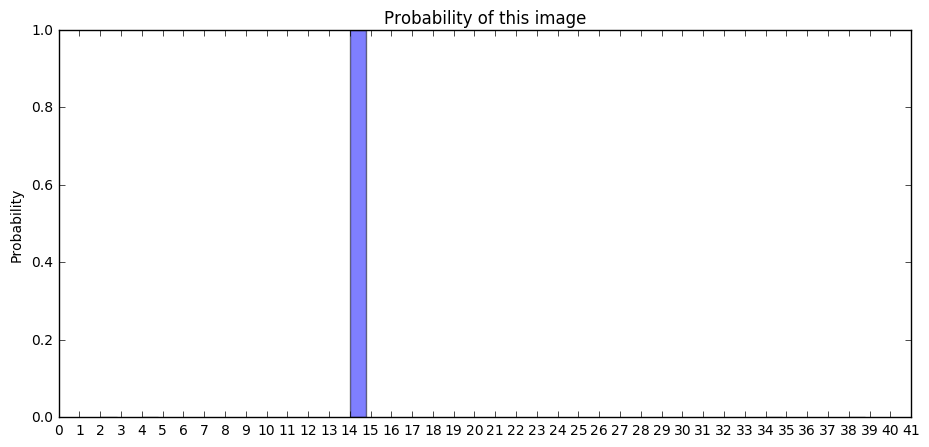

The below image, as guessed by the neural network, is: ['10', 'No passing for vehicles over 3.5 metric tons']
The actual answer is: ['25', 'Road work']


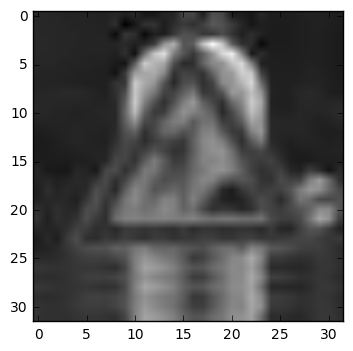

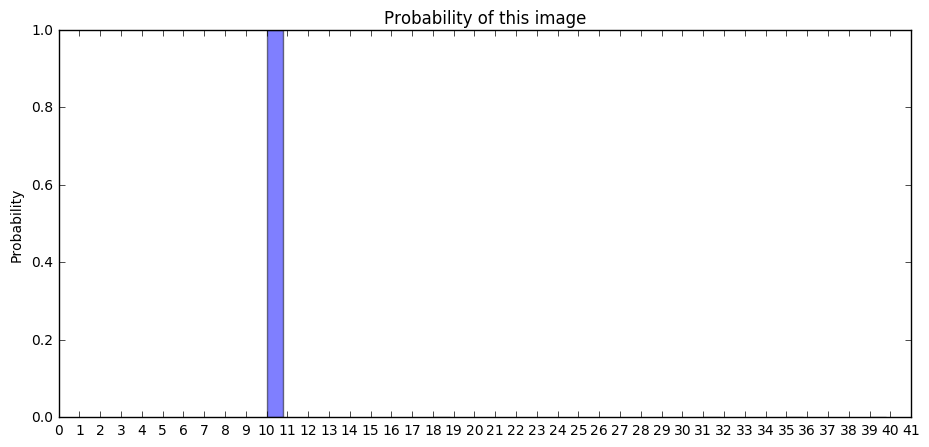

The below image, as guessed by the neural network, is: ['13', 'Yield']
The actual answer is: ['38', 'Keep right']


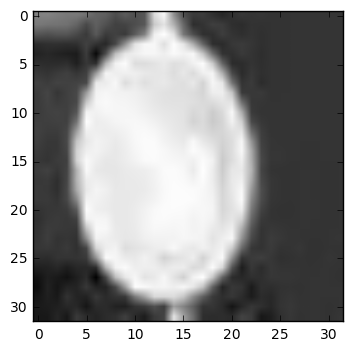

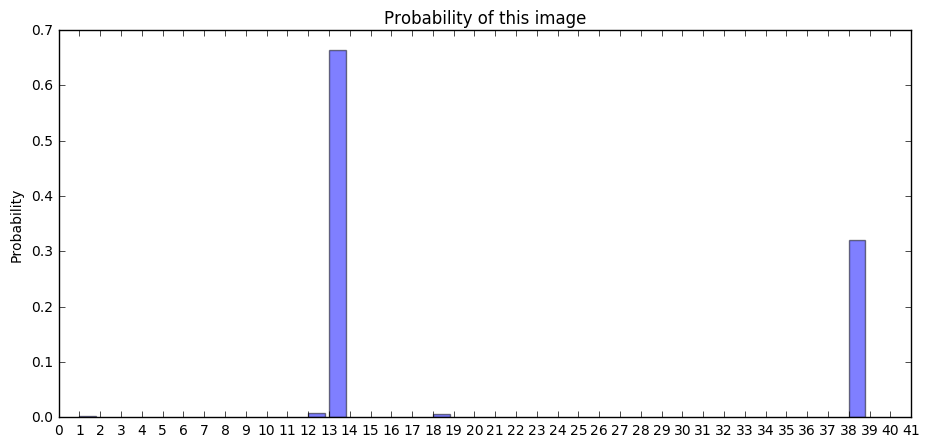

The below image, as guessed by the neural network, is: ['25', 'Road work']
The actual answer is: ['1', 'Speed limit (30km/h)']


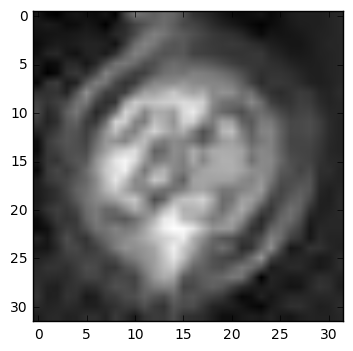

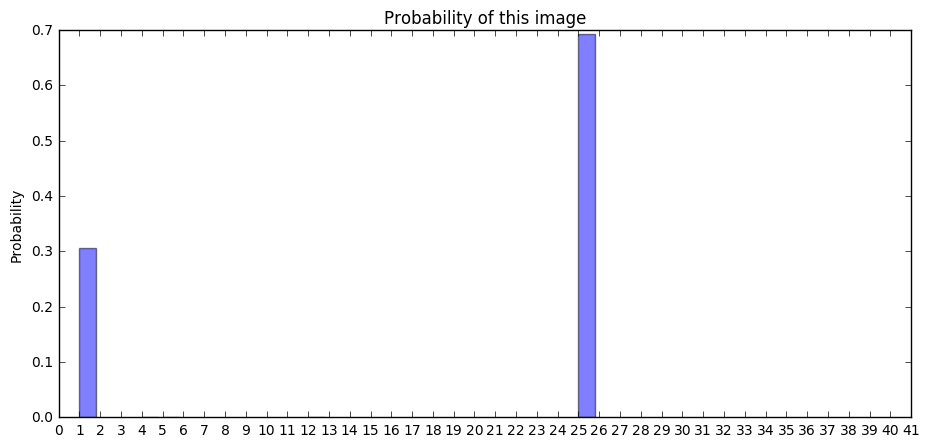

The below image, as guessed by the neural network, is: ['11', 'Right-of-way at the next intersection']
The actual answer is: ['31', 'Wild animals crossing']


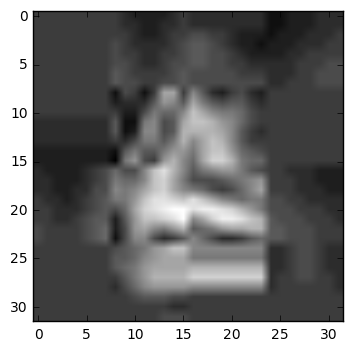

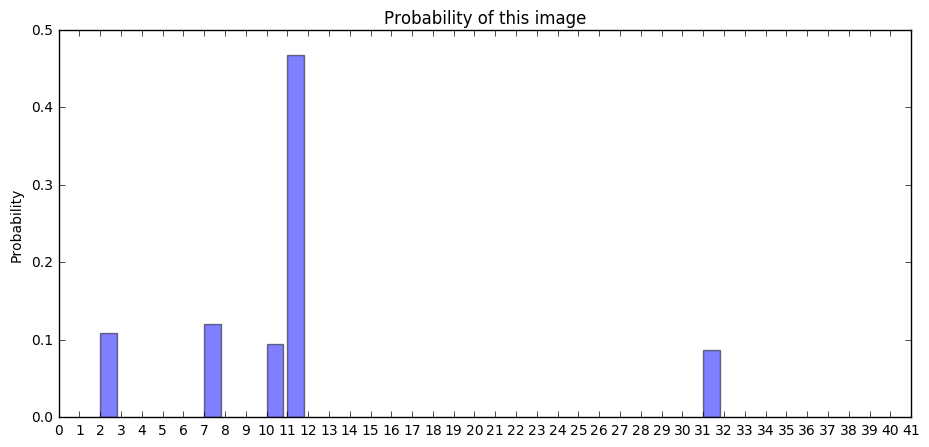

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

for i in range(0,10):
    print("The below image, as guessed by the neural network, is:",sign_list[top5[i][0]+1])
    print("The actual answer is:",sign_list[zy_data[i]+1])
    plt.figure()
    imgplot = plt.imshow(np.squeeze(Z_data[i]), cmap='gray')
    plt.figure(figsize=(11,5))
    plt.bar(top5[i], top5p[i], alpha=0.5)
    plt.xticks(np.arange(0,42,1))
    plt.ylabel('Probability')
    plt.title('Probability of this image')
    plt.show()

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 